[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/aldomunaretto/immune_deep_learning/blob/main/notebooks/04_NLP/21_NLP_Introduction_to_BERT.ipynb)

<h1><font color="#113D68" size=6>Procesamiento del Lenguaje Natural</font></h1>

<h1><font color="#113D68" size=5>Introducción a BERT</font></h1>

---

<a id="indice"></a>
<h2><font color="#004D7F" size=5>Índice</font></h2>

* [0. Contexto](#section0)
* [1. Del Transformer a BERT](#section1)
* [2. ¿Qué puede hacer BERT?](#section2)
* [3. BERT Preentrenado para resúmenes](#section3)
* [4. BERT para preguntas y respuestas](#section4)

<a id="section0"></a>
# <font color="#004D7F" size=6>0. Contexto</font>

El Transformer se diseñó originalmente como un modelo para traducir un idioma a otro. Si lo reutilizamos para una tarea diferente, necesitaremos volver a entrenar todo el modelo desde cero, y el tiempo que necesita es enorme, nos gustaría tener una solución que nos permita reutilizar fácilmente el Transformer entrenado para muchas tareas diferentes. BERT es uno de esos modelos.

Después de completar este tutorial, sabrás:

- ¿Qué es un codificador bidireccional? Representaciones del transformador (BERT)
- Cómo se puede reutilizar un modelo BERT para diferentes propósitos
- Cómo puede usar un modelo BERT preentrenado

---

<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section0"></a>
# <font color="#004D7F" size=6>1. Del Transformer a BERT</font>

En Transformer, el encoder y Decoder están conectados para hacer un modelo _seq2seq_ para que pueda realizar una traducción. Recuerda que la ecuación de _attention_ es:

$$
     attention(Q,K,V) = Softmax(\frac{QK^T}{\sqrt{d_k}})V
$$

Pero cada uno de los _Q, K y V_ anteriores hay un vector de embedding transformado por una matriz de los pesos en el modelo de Transformer. Entrenar un modelo Transformers significa encontrar estas matrices de los pesos. Una vez que se aprenden las matrices de los pesos, el Transformer se convierte en un modelo de lenguaje, lo que significa que representa una forma de entender el lenguaje que usó para entrenarlo.

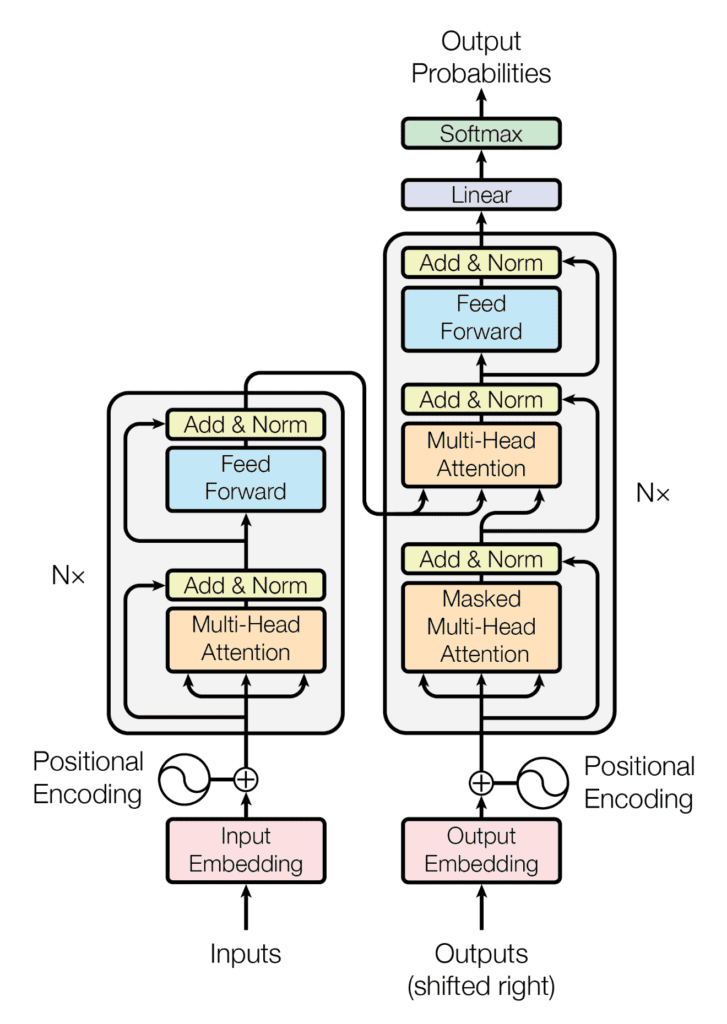

In [ ]:
from IPython.display import Image, display

display(Image('data/BERT_1.png'))

Un Transformer tiene partes de Encoder y Decoder
- El Encoder transforma oraciones y párrafos en un formato interno (una matriz numérica) que comprende el contexto,
- El Decoder hace lo contrario.

La combinación del Encoder y Decoder permite que un Transformer realice tareas _seq2seq_, como la traducción.

El _Bidirectional Encoder Representation from Transformer (BERT)_ aprovecha el modelo de _attention_ para obtener una comprensión más profunda del contexto del idioma. BERT es una pila de muchos bloques Encoders.
- El texto de entrada se separa en tokens como en el modelo Transformer, y cada token se transformará en un vector a la salida de BERT.

---

<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section2"></a>
# <font color="#004D7F" size=6>2. ¿Qué puede hacer BERT?</font>

Un modelo BERT se entrena utilizando el modelo de lenguaje enmascarado (MLM) y la predicción de la siguiente oración (NSP) simultáneamente.

Cada muestra de entrenamiento para BERT es un par de oraciones de un documento.
- Las dos oraciones pueden ser consecutivas en el documento o no.
- Habrá un token ___[CLS]___ antepuesto a la primera oración (para representar la __clase__) y un token ___[SEP]___ agregado a cada oración (como __separador__).
- Luego, las dos oraciones se concatenarán como una secuencia de tokens para convertirse en una muestra de entrenamiento.
- Un pequeño porcentaje de los tokens en la muestra de entrenamiento se enmascara con un token especial ___[MASK]___ o se reemplaza con un token aleatorio.
- Los tokens en la muestra de entrenamiento se transformarán en vectores incrustados, con las codificaciones posicionales agregadas, y en particular a BERT, con __segmentos de incrustaciones__ agregadas también para marcar si el token es de la primera o segunda oración.

Cada token de entrada al modelo BERT producirá un vector de salida. En un modelo BERT bien entrenado, esperamos:
- La salida correspondiente al token enmascarado ___[MASK]___ puede revelar cuál era el token original
- La salida correspondiente al token ___[CLS]___ al principio puede revelar si las dos oraciones son consecutivas en el documento

Entonces, los pesos entrenados en el modelo BERT pueden entender bien el contexto del lenguaje.

Una vez que tenga un modelo BERT de este tipo, puede usarlo para muchas tareas posteriores con la técnica finetunning:
- Por ejemplo, al agregar una capa de clasificación adecuada encima de un codificador e ingresar solo una oración al modelo en lugar de un par, puede tomar el token de clase ___[CLS]___ como entrada para la clasificación de opiniones.
    - Funciona porque la salida del token de clase está entrenada para agregar la atención de toda la entrada.
- Otro ejemplo es tomar una pregunta como la primera oración y el texto (por ejemplo, un párrafo) como la segunda oración, luego el token de salida de la segunda oración puede marcar la posición donde descansa la respuesta a la pregunta.
    - Funciona porque la salida de cada token revela información sobre ese token en el contexto de toda la entrada.



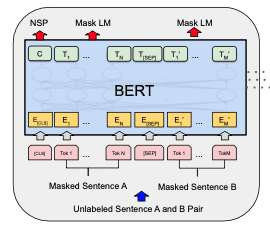

In [ ]:
display(Image('data/BERT_2.png'))

---

<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section3"></a>
# <font color="#004D7F" size=6>3. BERT Preentrenado para resúmenes</font>

Veamos un resumen de BERT antes de trabajar con él:
- Teóricamente, un modelo BERT es un Decoder que asigna cada token de entrada a un vector de salida, que se puede extender a una secuencia de tokens de longitud infinita.
- En la práctica, existen limitaciones impuestas en la implementación de otros componentes que limitan el tamaño de entrada. En su mayoría, unos pocos cientos de tokens deberían funcionar, ya que no todas las implementaciones pueden tomar miles de tokens de una sola vez.

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
Para esta práctica utilizaremos el artículo del [Bank of England](https://www.project-syndicate.org/commentary/bank-of-england-gilt-purchases-necessary-but-mistakes-made-by-willem-h-buiter-and-anne-c-sibert-2022-10)

Primero, exploremos la tarea para resumir. Usando BERT, la idea es extraer algunas oraciones del texto original que representan el texto completo. Puede ver que esta tarea es similar a la predicción de la siguiente oración, en la que si se le da una oración y el texto, desea clasificar si están relacionados.

Para hacer eso, necesitas usar el módulo de Python `bert-extractive-summarizer`

In [2]:
!pip install bert-extractive-summarizer

Es un Wrapper para algunos modelos Hugging Face para proporcionar la canalización de tareas de resumen.

El modelo utilizado se denominó `distilbert-base-uncased`.
- __DistilBERT__ es un modelo BERT simplificado que puede ejecutarse más rápido y usar menos memoria.
- El modelo es __`uncased`__ ("sin mayúsculas"), lo que significa que las mayúsculas o minúsculas en el texto de entrada se consideran iguales una vez que se transforman en vectores de incrustación.

La salida del modelo de resumen es una cadena.
- Si se especifica `num_sentences=3` al invocar el modelo, el resumen son tres oraciones seleccionadas del texto.

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
Más información en [Hugging Face](https://huggingface.co/distilbert-base-uncased)

In [3]:
from summarizer import Summarizer

with open ('data/bankengland.txt', 'r') as f:
  text = f.read()

model = Summarizer('distilbert-base-uncased')
result = model(text, num_sentences=3)
print(result)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Amid the political turmoil of outgoing British Prime Minister Liz Truss’s
short-lived government, the Bank of England has found itself in the
fiscal-financial crossfire. Whatever government comes next, it is vital
that the BOE learns the right lessons. According to a statement by the BOE’s Deputy Governor for
Financial Stability, Jon Cunliffe, the MPC was merely “informed of the
issues in the gilt market and briefed in advance of the operation,
including its financial-stability rationale and the temporary and targeted
nature of the purchases.”


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [4]:
import torch
from transformers import BertTokenizerFast, EncoderDecoderModel
device = 'cuda' if torch.cuda.is_available() else 'cpu'
ckpt = 'mrm8488/bert2bert_shared-spanish-finetuned-summarization'
tokenizer = BertTokenizerFast.from_pretrained(ckpt)
model = EncoderDecoderModel.from_pretrained(ckpt).to(device)

def generate_summary(text):

   inputs = tokenizer([text], padding="max_length", truncation=True, max_length=512, return_tensors="pt")
   input_ids = inputs.input_ids.to(device)
   attention_mask = inputs.attention_mask.to(device)
   output = model.generate(input_ids, attention_mask=attention_mask)
   return tokenizer.decode(output[0], skip_special_tokens=True)

with open ('data/texto.txt', 'r') as f:
  text = f.read()

generate_summary(text)


tokenizer_config.json:   0%|          | 0.00/520 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/242k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/4.51k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/555M [00:00<?, ?B/s]

The following encoder weights were not tied to the decoder ['bert/pooler']
The following encoder weights were not tied to the decoder ['bert/pooler']
The following encoder weights were not tied to the decoder ['bert/pooler']
The following encoder weights were not tied to the decoder ['bert/pooler']


'El restaurante Rebollo y Díaz ofrece una oportunidad laboral que pocos podrían rechazar, ofreciendo un salario atractivo y beneficios adicionales'

---

<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section4"></a>
# <font color="#004D7F" size=6>4. BERT para preguntas y respuestas</font>

El otro ejemplo del uso de BERT es hacer coincidir las preguntas con las respuestas. Le dará tanto la pregunta como el texto al modelo y buscará la salida del principio y el final de la respuesta del texto.

Un ejemplo rápido sería solo unas pocas líneas de código de la siguiente manera, reutilizando el mismo texto de ejemplo que en el ejemplo anterior:

In [ ]:
#!pip install transformers torch tensorflow

In [5]:
from transformers import pipeline

with open ('data/bankengland.txt', 'r') as f:
  text = f.read()

question = "What is BOE means?"

answer = pipeline("question-answering", model="distilbert-base-uncased-distilled-squad")
result = answer(question = question, context = text)

print(result)

config.json:   0%|          | 0.00/451 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/265M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

{'score': 0.7869579792022705, 'start': 1232, 'end': 1238, 'answer': 'buyers'}


Aquí es donde puede
- Encontrar la respuesta (que es una oración del texto de entrada),
- La posición inicial y final en el orden de token de donde proviene esta respuesta.
- La puntuación puede considerarse como la puntuación de confianza del modelo de que la respuesta podría ajustarse a la pregunta.

Lo que hizo el modelo fue generar un puntaje de probabilidad para el mejor comienzo en el texto que responde la pregunta, así como el texto para el mejor final. Luego, la respuesta se extrae encontrando la ubicación de las probabilidades más altas.

In [6]:
from transformers import T5ForConditionalGeneration, AutoTokenizer
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
ckpt = 'mrm8488/spanish-t5-small-sqac-for-qa'
tokenizer = AutoTokenizer.from_pretrained(ckpt)
model = T5ForConditionalGeneration.from_pretrained(ckpt).to(device)



def get_answer(question, context):
  input_text = 'question: %s  context: %s' % (question, context)
  features = tokenizer([input_text ], padding='max_length', truncation=True, max_length=512, return_tensors='pt')
  output = model.generate(input_ids=features['input_ids'].to(device),
               attention_mask=features['attention_mask'].to(device))

  return tokenizer.decode(output[0], skip_special_tokens=True)

context = '''
La ex codirectora del grupo de investigación de IA ética de Google, Margaret Mitchell,
quien fue despedida en febrero después de una controversia sobre un artículo crítico del que fue coautora,
se unirá a HuggingFace para ayudar a que los algoritmos de IA sean más justos.
'''

question = '¿Qué hará Margaret Mitchell en HuggingFace?'

print(get_answer(context, question))

tokenizer_config.json:   0%|          | 0.00/1.92k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/1.79k [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


config.json:   0%|          | 0.00/1.46k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/242M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1168: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


ayudar a que los algoritmos de ia sean más justos


<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<div style="text-align: right"> <font size=6><i class="fa fa-coffee" aria-hidden="true" style="color:#004D7F"></i> </font></div>